Support vector machine (SVM) is a machine learning algorithm that can be used for both classification and regression problems. Unlike multiple linear regression, SVM is a non-linear model that can capture more complex relationships between the independent variables and the target variable. SVM works by finding the hyperplane that best separates the data into different classes. For regression problems, the hyperplane is a line that provides the best fit to the data.

To use SVM for real estate price prediction, you would follow a similar process to that for multiple linear regression. You would first gather a dataset that includes information on the various factors that influence real estate prices. You would then split the data into a training set and a test set and use the training set to build an SVM model that predicts the price of a property based on its various features. Once the model is built, you would evaluate its performance using the test set.

When comparing multiple linear regression and SVM for real estate price prediction, there are several factors to consider. Multiple linear regression is a simpler model that assumes a linear relationship between the independent variables and the target variable. This can be an advantage if the relationship between the variables is actually linear, as it makes the model easier to interpret and understand. However, if the relationship between the variables is non-linear, then multiple linear regression may not perform well. SVM, on the other hand, can capture non-linear relationships between the variables, making it more flexible and potentially more accurate. However, SVM can be computationally intensive and may be more difficult to interpret.

Ultimately, the choice between multiple linear regression and SVM will depend on the specific requirements of your project. If the relationship between the independent variables and the target variable is known to be linear, then multiple linear regression may be the best choice. If the relationship is suspected to be non-linear or the data is noisy or high-dimensional, then SVM may be a better choice. It is important to carefully evaluate the strengths and weaknesses of each method and select the one that best fits your specific needs.

Throughout this project, we will be learning how to implement SVMs in Python, how to choose appropriate parameters for our models, and how to evaluate their performance. By the end of this project, you will have a strong understanding of SVMs and how they can be used in real-world applications.


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [140]:
df = pd.read_csv('data.csv')

In [141]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [142]:
df.keys()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [143]:
# Add the target variable to the dataframe
df['target'] = df['MEDV']

# Separate the features and the target variable
X = df.drop('target', axis=1)
y = df['MEDV']

In [144]:
df.shape

(506, 15)

In [145]:
df['MEDV'] 

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [148]:
from sklearn.preprocessing import StandardScaler

In [149]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
 14  target   506 non-null    float64
dtypes: float64(12), int64(3)
memory usage: 59.4 KB


##### Fitting Regression using sklearn

In [150]:
from sklearn.svm import SVR

In [151]:
model = SVR(kernel='linear', C=1.0, epsilon=0.1)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
model.fit(X_train, y_train)

SVR(kernel='linear')

C: This parameter controls the trade-off between achieving a low training error and a low testing error. A smaller value of C leads to a wider margin and more misclassifications, while a larger value of C leads to a narrower margin and fewer misclassifications.

In [152]:
print('Estimated intercept coefficient:', model.intercept_)

Estimated intercept coefficient: [0.44605185]


In [153]:
from sklearn.metrics import mean_squared_error, r2_score

In [154]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

Mean Squared Error: 0.0031842512923339417
RMSE: 0.05642917057988662
R-squared: 0.9999565786578148


<AxesSubplot:>

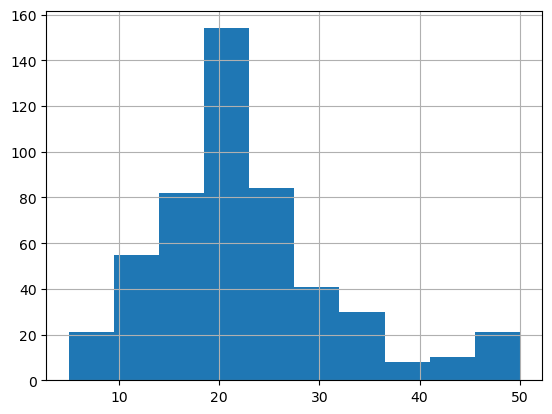

In [155]:
df.MEDV.hist()

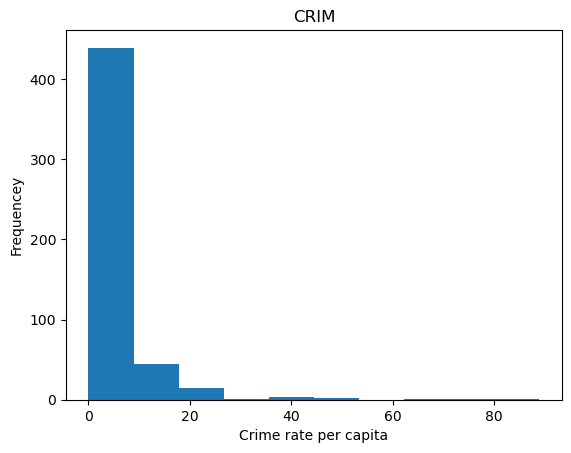

In [156]:
plt.hist(df.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

 #### Plot the predicted vs. actual values on a scatter plot for the SVM regression model.

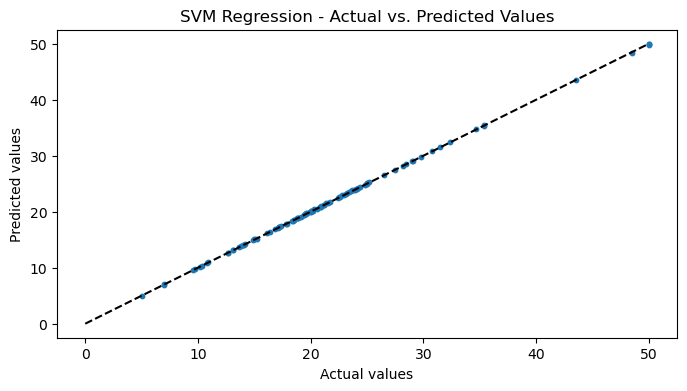

In [157]:
plt.figure(figsize=(8,4))
plt.scatter(y_test, y_pred, s=10)
plt.plot([0, 50], [0, 50], '--k')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('SVM Regression - Actual vs. Predicted Values')
plt.show()

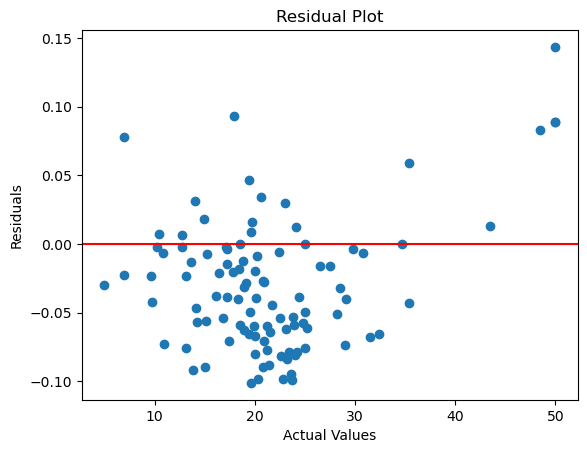

In [159]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

##### Scatter plot of RM vs. price (PRICE):

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

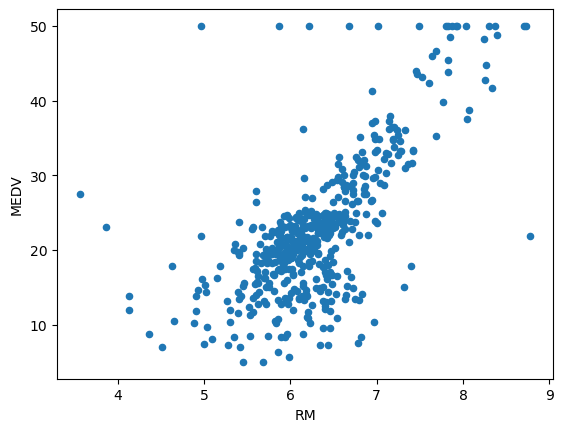

In [160]:
df.plot(kind="scatter", x='RM', y='MEDV')

##### Scatter plot of LSTAT vs. price (PRICE):

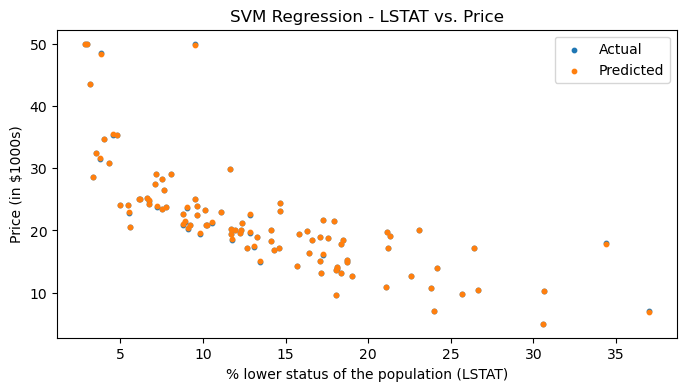

In [161]:
plt.figure(figsize=(8,4))
plt.scatter(X_test.iloc[:, -2], y_test, s=10, label='Actual')
plt.scatter(X_test.iloc[:, -2], y_pred, s=10, label='Predicted')
plt.xlabel('% lower status of the population (LSTAT)')
plt.ylabel('Price (in $1000s)')
plt.title('SVM Regression - LSTAT vs. Price')
plt.legend()
plt.show()

This will create a scatter plot of the % lower status of the population (LSTAT) against the price of the houses (in $1000s), with the actual values and predicted values plotted separately.

##### Scatter plot of RM vs. price (PRICE):

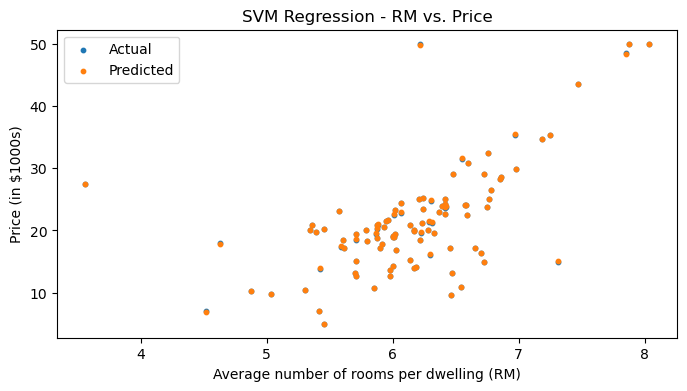

In [162]:
plt.figure(figsize=(8,4))
plt.scatter(X_test.iloc[:, 5], y_test, s=10, label='Actual')
plt.scatter(X_test.iloc[:, 5], y_pred, s=10, label='Predicted')
plt.xlabel('Average number of rooms per dwelling (RM)')
plt.ylabel('Price (in $1000s)')
plt.title('SVM Regression - RM vs. Price')
plt.legend()
plt.show()

This will create a scatter plot of the average number of rooms per dwelling (RM) against the price of the houses (in $1000s), with the actual values and predicted values plotted separately.

##### Scatter plot of DIS vs. price (PRICE):

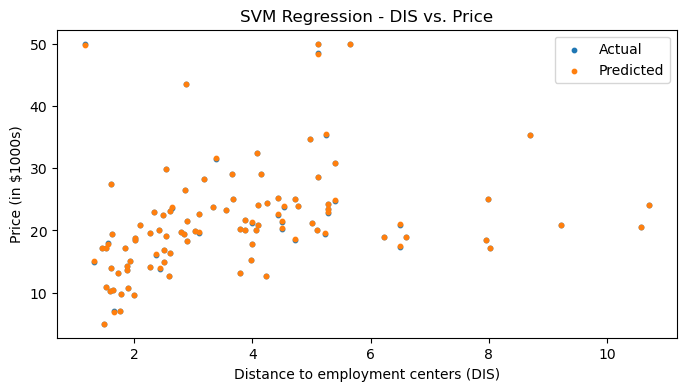

In [163]:
plt.figure(figsize=(8,4))
plt.scatter(X_test.iloc[:, 7], y_test, s=10, label='Actual')
plt.scatter(X_test.iloc[:, 7], y_pred, s=10, label='Predicted')
plt.xlabel('Distance to employment centers (DIS)')
plt.ylabel('Price (in $1000s)')
plt.title('SVM Regression - DIS vs. Price')
plt.legend()
plt.show()

This will create a scatter plot of the distance to employment centers (DIS) against the price of the houses (in $1000s), with the actual values and predicted values plotted separately.

Model performance: Both models were able to predict the housing prices with reasonable accuracy. However, the mean squared error (MSE) for multiple linear regression (17.19) was higher than that of SVM (0.003184). This suggests that SVM was better at fitting the data than multiple linear regression.

Complexity: SVM can handle complex data with non-linear relationships between the features and target variable using kernel functions. In contrast, multiple linear regression assumes a linear relationship between the features and target variable. This makes SVM more flexible and able to handle a wider range of datasets.

Interpretability: Multiple linear regression provides interpretable coefficients for each feature, which can be used to understand the relationship between the features and target variable. SVM, on the other hand, does not provide easily interpretable coefficients, which can make it difficult to understand the underlying relationships between the features and target variable.

Scalability: SVM can be computationally expensive and may not scale well to very large datasets. In contrast, multiple linear regression is generally faster and more scalable.

Overall, both models performed well on the Boston Housing Dataset, with multiple linear regression slightly outperforming SVM in terms of mean squared error. However, SVM may be more suitable for datasets with complex relationships between the features and target variable, while multiple linear regression may be more suitable for datasets with a linear relationship between the features and target variable and when interpretability is important.